Uses REBOUND commit a675e6f92cba32bae86f94739faec3b1b3098e81

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.dataframe as dd
%matplotlib inline

pathtofolders = '/mnt/ssd/workspace/stability/'
resonantsa = 'stabilitydatasetresonant/data/resonant/simulation_archives/runs/'

In [2]:
pd.set_option('display.float_format', '{:.12E}'.format)
dfres = pd.read_csv(pathtofolders+"stabilitydatasetresonant/data/csvs/data.csv", index_col = 0)
ddfres = dd.from_pandas(dfres, npartitions=24)
ddfres.head(10)

,runstring,seed,pairindex,j,k,Zstar,libfac,Zcom,instability_time,shadow_instability_time
0,0000000.bin,3500000,1,12,1,2.165038000000E-02,7.181011000000E-03,4.166906000000E-02,1.545872285422E+06,3.063700317874E+06
1,0000001.bin,700001,1,19,2,6.029125000000E-02,5.232044000000E-01,1.065561000000E-02,9.990000000050E+08,9.990000000050E+08
2,0000002.bin,2,0,6,1,2.635348000000E-02,1.299504000000E-02,5.031908000000E-02,9.990000000050E+08,9.990000000050E+08
3,0000003.bin,2100003,0,5,2,2.351106000000E-02,7.134149000000E-01,1.021996000000E-01,2.287670643161E+06,8.392234130233E+06
4,0000004.bin,700004,0,12,1,1.747332000000E-02,3.611717000000E-03,3.980348000000E-02,9.668931133123E+05,3.380350030993E+05
5,0000005.bin,1400005,1,23,2,4.732225000000E-03,-2.638225000000E-02,4.879355000000E-02,5.755893738980E+05,5.459780948325E+04
6,0000006.bin,6,1,5,1,6.566680000000E-02,-7.724743000000E-02,3.076866000000E-02,7.248372136519E+07,3.243220485044E+08
7,0000007.bin,2100007,0,21,2,2.515836000000E-02,2.341128000000E-01,2.971840000000E-02,2.225858492785E+04,6.193744405792E+03
8,0000008.bin,8,1,7,1,2.261202000000E-02,7.720586000000E-03,3.904033000000E-02,2.930965984778E+05,1.359759407129E+06
9,0000009.bin,700009,1,11,2,9.254916000000E-03,3.572109000000E-03,1.014287000000E-02,3.484790616249E+05,9.534973284858E+05


# Test Reproducibility

In [23]:
row = dfres.loc[0]
sa = rebound.SimulationArchive(pathtofolders+resonantsa+'sa'+row['runstring'])
tmax = sa[1].t
sim = sa[0]
sim.integrate(tmax, exact_finish_time=0)
sim.status()

---------------------------------
REBOUND version:     	3.7.0
REBOUND built on:    	Dec 18 2018 14:04:31
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	1.0000000173176938e+06
Current timestep:    	0.034641
---------------------------------
<rebound.Particle object, m=0.9999960150799597 x=-3.658542143467641e-06 y=-1.949623323935794e-05 z=9.470806349629878e-08 vx=6.872767724455177e-05 vy=-3.73442855666929e-06 vz=3.496108378488267e-07>
<rebound.Particle object, m=3.984920040268468e-06 x=-0.8738958364059268 y=0.4817517647367535 z=-0.003159573737010137 vx=-2.9307195320280233 vy=-5.572709926922893 vz=0.0012280114770667806>
<rebound.Particle object, m=1.2444171101394952e-05 x=0.6063431581766432 y=1.4011530424916374 z=-0.007375445763490789 vx=-4.553768175624738 vy=2.174789434522493 vz=-0.026555396336484776>
<rebound.Particle object, m=2.531702420746453e-07 x=-1.5977605108526833 y=0.5538766686714539 z=0.03817301570906049 vx=-1.5043238809838 vy=-4.4327274873988936 vz=

In [24]:
sa[1].status()

---------------------------------
REBOUND version:     	3.7.0
REBOUND built on:    	Dec 18 2018 14:04:31
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	1.0000000173176938e+06
Current timestep:    	0.034641
---------------------------------
<rebound.Particle object, m=0.9999960150799597 x=-4.856594700194382e-06 y=-1.9390399072819718e-05 z=8.843982870513587e-08 vx=6.955063834692299e-05 vy=-8.515320693078855e-06 vz=3.739948348737675e-07>
<rebound.Particle object, m=3.984920040268468e-06 x=-0.8180433296520381 y=0.5752209770263266 z=-0.0031620314346973424 vx=-3.5115624014482423 vy=-5.209884722895365 vz=-0.0009422170175565305>
<rebound.Particle object, m=1.2444171101394952e-05 x=0.684162037660043 y=1.3611697180480018 z=-0.006903453305578572 vx=-4.429348728877797 vy=2.4410887530953667 vz=-0.027931911275507863>
<rebound.Particle object, m=2.531702420746453e-07 x=-1.569761335862975 y=0.6299450423595112 z=0.03977055194939125 vx=-1.7280560050004896 vy=-4.34911033866259

There's some bug where if we don't also start a simulation archive we don't get things exactly. If we run with a simulation archive like we did originally, and then load the snapshot in that archive we match

In [25]:
row = dfres.loc[1]
sa = rebound.SimulationArchive(pathtofolders+resonantsa+'sa'+row['runstring'])
tmax = sa[1].t
sim = sa[0]
sim.automateSimulationArchive('test.bin', interval=1.e6, deletefile=True)
sim.integrate(tmax*1.5, exact_finish_time=0)
sa = rebound.SimulationArchive('test.bin')
sa[1].status()

---------------------------------
REBOUND version:     	3.7.0
REBOUND built on:    	Dec 18 2018 14:04:31
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	1.0000000173176938e+06
Current timestep:    	0.034641
---------------------------------
<rebound.Particle object, m=0.999999793444311 x=-4.96108382084024e-06 y=-2.0114170547773096e-05 z=4.4737730704095235e-07 vx=9.014542558821086e-05 vy=-2.1954283463092724e-05 vz=1.9729696504277265e-06>
<rebound.Particle object, m=2.065556889998561e-07 x=0.899175372521619 y=-0.43228029244009597 z=-0.00022166147886997932 vx=2.7647358594045603 vy=5.6440447060159356 vz=-0.40104006738772546>
<rebound.Particle object, m=1.6814316545594097e-05 x=0.333965261462044 y=1.2022505982437925 z=-0.027414431642722125 vx=-5.407739200310696 vy=1.4752508657265193 vz=-0.12442396090894813>
<rebound.Particle object, m=6.83043088193565e-07 x=-1.2298559676732412 y=-0.016932678164774076 z=0.019945304700147572 vx=0.3088528750032169 vy=-5.8808378630948

In [22]:
sa = rebound.SimulationArchive(pathtofolders+resonantsa+'sa'+row['runstring'])
sa[1].status()

---------------------------------
REBOUND version:     	3.7.0
REBOUND built on:    	Dec 18 2018 14:04:31
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	1.0000000173176938e+06
Current timestep:    	0.034641
---------------------------------
<rebound.Particle object, m=0.999999793444311 x=-4.96108382084024e-06 y=-2.0114170547773096e-05 z=4.4737730704095235e-07 vx=9.014542558821086e-05 vy=-2.1954283463092724e-05 vz=1.9729696504277265e-06>
<rebound.Particle object, m=2.065556889998561e-07 x=0.899175372521619 y=-0.43228029244009597 z=-0.00022166147886997932 vx=2.7647358594045603 vy=5.6440447060159356 vz=-0.40104006738772546>
<rebound.Particle object, m=1.6814316545594097e-05 x=0.333965261462044 y=1.2022505982437925 z=-0.027414431642722125 vx=-5.407739200310696 vy=1.4752508657265193 vz=-0.12442396090894813>
<rebound.Particle object, m=6.83043088193565e-07 x=-1.2298559676732412 y=-0.016932678164774076 z=0.019945304700147572 vx=0.3088528750032169 vy=-5.8808378630948

Because we're integrating to t=1e4 and first snapshot is at 1e6 (and this is where having the simulationarchive on or off matters), I think we're OK. If we run one where particles collide before 1e6, we get it exact

In [26]:
row = dfres.loc[5]
print(row['instability_time'])

575589.3738979587


In [27]:
sa = rebound.SimulationArchive(pathtofolders+resonantsa+'sa'+row['runstring'])
tmax = sa[1].t
sim = sa[0]
try:
    sim.integrate(tmax, exact_finish_time=0)
except:
    print(sim.t)

575589.3738979587


In [43]:
row = dfres.loc[834]
print(row['instability_time'])

76916.01160455737


In [47]:
sa = rebound.SimulationArchive(pathtofolders+resonantsa+'sa'+row['runstring'])
tmax = sa[1].t
sim = sa[0]
try:
    for i, time in enumerate(times):
        sim.integrate(time)#, exact_finish_time=0)
except:
    print(sim.t)

In [ ]:
sim.integrate(1.e5)

In [ ]:
sim.integrator

In [44]:
run(row)

0000834.bin 4725.554218264117
0000834.bin 4739.583829805271
0000834.bin 4927.40741937599
0000834.bin 4945.593952855264
0000834.bin 4999.079681792407
0000834.bin 5080.208941618048
0000834.bin 5093.476450803881
0000834.bin 5096.420937176716
0000834.bin 5163.416662412748
0000834.bin 5333.053718504192
0000834.bin 5368.0065038005505
0000834.bin 5516.755027152942
0000834.bin 7352.174626897491
0000834.bin 8299.190726433511
0000834.bin 8739.616605777317
0000834.bin 8818.494199553143
0000834.bin 9986.069648922576


array([[ 1.00000000e+00,  6.50670471e-02,  1.21839765e-03, ...,
        -2.18692905e+00, -4.41646707e+00,  1.02263832e+00],
       [ 1.00000000e+00,  6.50670471e-02,  1.21839765e-03, ...,
        -2.18692905e+00, -4.41646707e+00,  1.02263832e+00],
       [ 1.00001950e+00,  6.50222455e-02,  1.21994065e-03, ...,
        -2.18737101e+00, -4.42005163e+00, -2.90127570e+00],
       ...,
       [ 9.99196058e-01,  7.74218610e-02,  4.12977343e-03, ...,
         2.70071018e+00,  2.08908421e+00,  1.27454610e+00],
       [ 9.99123342e-01,  7.74559028e-02,  4.10364539e-03, ...,
         2.69975782e+00,  2.08646207e+00,  1.19120669e+00],
       [ 9.99192940e-01,  7.74007877e-02,  4.11214670e-03, ...,
         2.69836881e+00,  2.08471047e+00, -4.71532960e-01]])

# One bad row

In [28]:
row = dfres.loc[2058]
row

runstring                        0002058.bin
seed                                       0
pairindex                                  0
j                                          0
k                                          0
Zstar                     0.000000000000E+00
libfac                    0.000000000000E+00
Zcom                      0.000000000000E+00
instability_time                         NaN
shadow_instability_time                  NaN
Name: 2058, dtype: object

In [5]:
def populate_masses(row):
    try:
        sa = rebound.SimulationArchive(pathtofolders+resonantsa+'sa'+row['runstring'])
    except:
        print(row['runstring'])
        return np.array([np.nan]*3)
    
    sim = sa[0]
    ps = sim.particles
    return np.array([ps[1].m, ps[2].m, ps[3].m])

def daskpop(df):
    return df.apply(populate_masses, axis=1)

In [6]:
%%time
res = ddfres.map_partitions(daskpop, meta = (None, 'i8')).compute(scheduler='processes') 

0002058.bin
CPU times: user 687 ms, sys: 263 ms, total: 950 ms
Wall time: 1.5 s


In [7]:
Nsys = dfres.shape[0]
masses = np.concatenate(res.values).ravel().reshape((Nsys, 3))

In [9]:
dfcut = dfres[['instability_time']]
dfcut.head()

,instability_time
0,1.545872285422E+06
1,9.990000000050E+08
2,9.990000000050E+08
3,2.287670643161E+06
4,9.668931133123E+05


In [10]:
dfcut['m1'] = masses[:, 0]
dfcut['m2'] = masses[:, 1]
dfcut['m3'] = masses[:, 2]
dfcut.head()

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,instability_time,m1,m2,m3
0,1.545872285422E+06,3.984920040268E-06,1.244417110139E-05,2.531702420746E-07
1,9.990000000050E+08,2.065556889999E-07,1.681431654559E-05,6.830430881936E-07
2,9.990000000050E+08,1.797281332529E-07,3.209938505272E-05,9.648477021995E-05
3,2.287670643161E+06,4.704417866235E-05,6.920889240143E-06,1.615757544836E-05
4,9.668931133123E+05,3.514145456401E-06,7.277734243809E-07,4.655599532986E-05


In [11]:
dfcut['Stable'] = dfcut['instability_time'] > 9.99e8
dfcut.head()

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,instability_time,m1,m2,m3,Stable
0,1.545872285422E+06,3.984920040268E-06,1.244417110139E-05,2.531702420746E-07,False
1,9.990000000050E+08,2.065556889999E-07,1.681431654559E-05,6.830430881936E-07,True
2,9.990000000050E+08,1.797281332529E-07,3.209938505272E-05,9.648477021995E-05,True
3,2.287670643161E+06,4.704417866235E-05,6.920889240143E-06,1.615757544836E-05,False
4,9.668931133123E+05,3.514145456401E-06,7.277734243809E-07,4.655599532986E-05,False


In [12]:
dfcut.shape

(10000, 5)

In [14]:
dfcut.to_csv(pathtofolders+'stabilitydatasetresonant/data/resmetadata.csv', encoding='ascii')

In [39]:
def run(row):
    val = np.zeros((Nout, 18))
    if row['instability_time'] < 1.e4:
        return val
    
    try:
        sa = rebound.SimulationArchive(pathtofolders+resonantsa+'sa'+row['runstring'])
    except:
        print(row['runstring'])
        return val
    
    sim = sa[0]
    
    for i, time in enumerate(times):
        orbits = sim.calculate_orbits()
        for j, o in enumerate(orbits):
            val[i,6*j+0] = o.a
            val[i,6*j+1] = o.e
            val[i,6*j+2] = o.inc
            val[i,6*j+3] = o.Omega
            val[i,6*j+4] = o.pomega
            val[i,6*j+5] = o.M
        try:
            sim.integrate(time, exact_finish_time=0)
        except:
            print(row['runstring'], sim.t)
    return val

def mychunk(df):
    return df.apply(run, axis=1)

In [37]:
tmax = 1e4
Nsys = dfres.shape[0]
Nout = 1729
times = np.linspace(0, tmax, Nout)

In [36]:
dfres.loc[834]

runstring                        0000834.bin
seed                                 2100834
pairindex                                  1
j                                          4
k                                          1
Zstar                     2.207694000000E-02
libfac                    5.191085000000E-02
Zcom                      8.559673000000E-02
instability_time          7.691601160456E+04
shadow_instability_time   6.132533730253E+03
Name: 834, dtype: object

In [40]:
%%time
res = ddfres.map_partitions(mychunk, meta = (None, 'i8')).compute(scheduler='processes') 

0000834.bin 4725.554218264117
0000834.bin 4739.583829805271
0000834.bin 4927.40741937599
0000834.bin 4945.593952855264
0000834.bin 4999.079681792407
0000834.bin 5080.208941618048
0000834.bin 5093.476450803881
0000834.bin 5096.420937176716
0000834.bin 5163.416662412748
0000834.bin 5333.053718504192
0000834.bin 5368.0065038005505
0000834.bin 5516.755027152942
0000834.bin 7352.174626897491
0000834.bin 8299.190726433511
0000834.bin 8739.616605777317
0000834.bin 8818.494199553143
0000834.bin 9986.069648922576
0000834.bin 4725.554218264117
0000834.bin 4739.583829805271
0000834.bin 4927.40741937599
0000834.bin 4945.593952855264
0000834.bin 4999.079681792407
0000834.bin 5080.208941618048
0000834.bin 5093.476450803881
0000834.bin 5096.420937176716
0000834.bin 5163.416662412748
0000834.bin 5333.053718504192
0000834.bin 5368.0065038005505
0000834.bin 5516.755027152942
0000834.bin 7352.174626897491
0000834.bin 8299.190726433511
0000834.bin 8739.616605777317
0000834.bin 8818.494199553143
0000834.bi

0005431.bin 7554.789930364686
0005431.bin 7572.214361488639
0005431.bin 7593.414663373051
0005431.bin 7613.402529692177
0005431.bin 7637.166266771763
0005431.bin 7682.13030573576
0005431.bin 7699.624018892015
0005431.bin 9464.133458575468
0005431.bin 9476.604224389828
0005431.bin 9501.545756018548
0005431.bin 9522.919262983714
0005431.bin 9535.493951846527
0005431.bin 9556.832817795543
0005431.bin 9560.608688556002
0005431.bin 9584.44170766789
0005431.bin 9605.745932600754
0005431.bin 9629.578951712641
0005431.bin 9654.624406389814
0005431.bin 9674.750836773545
0006270.bin 7473.279619361385
0006270.bin 9715.800440912479
0006270.bin 9858.036453228482
0006270.bin 9979.383932805433
0003768.bin 3723.874595241819
0003768.bin 6994.921827332235
0003768.bin 7065.10452605416
0003768.bin 7087.967596713819
0003768.bin 7088.452570939933
0003768.bin 7089.076109230651
0003768.bin 7125.10276602769
0003768.bin 7168.230831135685
0003768.bin 7469.780876730134
0003768.bin 7510.414788675256
0003768.bin 75

0000439.bin 7607.305710849601
0000439.bin 7677.765537700734
0000439.bin 7744.51877582371
0000439.bin 7765.649795675819
0000439.bin 7813.0733467865375
0000439.bin 7847.367952776027
0002939.bin 4036.059432794625
0002939.bin 4066.0585527813905
0002939.bin 4095.122365332079
0002939.bin 4152.34932401353
0002939.bin 4200.53497747957
0002939.bin 4227.624252109652
0002939.bin 4321.951739088823
0002939.bin 4377.169518833516
0002939.bin 4387.180772501155
0002939.bin 4408.5196384501705
0002939.bin 5189.847757735961
0002939.bin 5212.918674492526
0002939.bin 5232.005874391727
0002939.bin 5293.285831962845
0002939.bin 5323.423516014214
0002939.bin 5347.53366325531
0002939.bin 5374.726860933844
0002939.bin 5438.01599744172
0002520.bin 7437.114398499742
0002939.bin 5459.112376277679
0002520.bin 7514.675633661829
0002939.bin 5549.594710464089
0002939.bin 5690.306518069448
0002939.bin 5717.39579269953
0002939.bin 5736.482992598731
0002939.bin 5759.657832403749
0002939.bin 5809.818023790396
0002939.bin 5

0001287.bin 9965.596808377335
0008369.bin 9009.504762609753
0008369.bin 9112.319298545919
0005874.bin 6891.10270192769
0005874.bin 6934.715741261798
0005874.bin 7132.619866532457
0005874.bin 7225.146020671777
0005874.bin 7493.6138958420215
0005874.bin 7507.262456205515
0005874.bin 7578.172616266611
0005874.bin 7753.386875958366
0005874.bin 7795.82212074334
0005874.bin 7901.823630165398
0005874.bin 8003.010038342467
0005874.bin 8009.037575152741
0005874.bin 8022.893981613141
0005874.bin 8101.598370308211
0005874.bin 8106.205625456294
0005874.bin 8124.600005032475
0005874.bin 8140.465590429632
0005874.bin 8157.855380537434
0005874.bin 8167.104531849751
0005874.bin 8202.161240194562
0005874.bin 8246.46709985169
0005874.bin 8266.939940396931
0005874.bin 8293.786727913955
0005874.bin 8309.51374924651
0005874.bin 8330.055871824052
0005874.bin 8358.461505067871
0005874.bin 8407.409260889233
0005874.bin 8434.256048406258
0005874.bin 8451.64583851406
0005874.bin 8472.291884140055
0005874.bin 84

0007139.bin 6628.974132713078
0007139.bin 6652.98035690572
0007139.bin 6658.037945263766
0007139.bin 6663.060892605661
0007139.bin 6672.102197821072
0007139.bin 6699.2953954996065
0007139.bin 6769.547376253833
0007139.bin 6789.604524605262
0007139.bin 6839.868639040362
0007139.bin 6899.000853610118
0007139.bin 6927.094717708578
0007139.bin 6961.2507596334635
0007139.bin 6991.353802668682
0007139.bin 6996.376750010577
0007139.bin 7003.374235273079
0007139.bin 7146.545555025159
0007139.bin 7160.505884534012
0007139.bin 7171.071394460067
0007139.bin 7195.666515927276
0007139.bin 7219.153124877654
0007139.bin 7234.395171984093
0007139.bin 7800.186888778366
0007139.bin 7828.280752876826
0007139.bin 7829.423906409809
0007139.bin 7830.601700958943
0007139.bin 7862.228948704806
0007139.bin 7863.40674325394
0007139.bin 7864.5845378030735
0007139.bin 7865.7623323522075
0007139.bin 7866.9401269013415
0007139.bin 7868.1179214504755
0007139.bin 7999.060962501253
0007139.bin 8000.238757050387
000713

0006727.bin 8952.970624251322
0006727.bin 9113.73958020811
0006727.bin 9613.95585342854
0006727.bin 9986.416059084086
0006728.bin 9365.822254738932
0006728.bin 9607.02765019834
0006728.bin 9679.912348180043
0006728.bin 9926.62566520746
0005478.bin 4094.741314154418
0005478.bin 4135.894841341806
0005478.bin 4432.42193959436
0005478.bin 4555.778598108069
0005478.bin 4593.537305712658
0005478.bin 5296.57672849719
0005478.bin 5342.441433881113
0005478.bin 5971.868697344771
0005478.bin 6315.472936546534
0005478.bin 6359.432386042152
0001315.bin 7054.816144257313
0005478.bin 6513.238497752589
0005478.bin 6535.6858762184365
0005478.bin 6589.1369641394285
0005478.bin 6623.085159967408
0005478.bin 6654.054228406401
0005478.bin 6676.501606872249
0005478.bin 6762.376685910576
0005478.bin 6762.411326926727
0005478.bin 7113.775153746314
0005478.bin 7310.605407516292
0003814.bin 1520.1863527890664
0003814.bin 1751.83082779384
0005478.bin 8158.582841876605
0005478.bin 8158.617482892756
0005478.bin 82

0005485.bin 7048.372915253227
0005485.bin 7098.775593752931
0005485.bin 7159.535936081784
0005485.bin 7235.503684500925
0005485.bin 7258.921011419001
0005485.bin 7283.1004406923985
0005485.bin 7308.80407467644
0005485.bin 7333.3991961436495
0005485.bin 7369.356570908387
0005485.bin 7403.859022994782
0005485.bin 7435.555552772947
0005485.bin 7479.133951090904
0005485.bin 7505.218636252606
0005485.bin 7595.700970439017
0005485.bin 7863.372102237789
0005485.bin 7886.685506107411
0005485.bin 8072.77704487058
0005485.bin 8085.005323571882
0005485.bin 8110.708957555924
0005485.bin 8138.698898605931
0005485.bin 8257.86399416537
0005485.bin 8439.036508635096
0005485.bin 8502.845260385237
0005485.bin 8525.327279867235
0005485.bin 8560.002937034385
0005485.bin 9101.26881439375
0003396.bin 7309.427612967158
0003396.bin 7309.462253983309
0003396.bin 7321.2748404908
0005485.bin 9265.22474383643
0005485.bin 9323.906625196223
0005485.bin 9382.553865539865
0003396.bin 7525.033297490978
0005485.bin 938

0007165.bin 7695.952071180009
0007165.bin 7722.383166503221
0007165.bin 7771.088435211526
0007165.bin 7799.043735245383
0005495.bin 7548.7277525382615
0007165.bin 7823.431010615686
0007165.bin 7823.465651631837
0005495.bin 7602.1095584269515
0005495.bin 7656.4613127678695
0005495.bin 7676.068127909335
0007165.bin 7906.74265445884
0007165.bin 8004.464961020809
0007165.bin 8198.904984676368
0007165.bin 8228.661617550077
0007165.bin 8238.187896991602
0007165.bin 8258.695378552993
0007165.bin 8258.730019569144
0001331.bin 2815.310023633408
0007165.bin 8358.149735922512
0007165.bin 8480.986779193956
0007165.bin 8482.372419839996
0007165.bin 8514.06894961816
0007165.bin 8515.4545902642
0007165.bin 8603.304207223135
0007165.bin 8619.550843797953
0007165.bin 8645.704810991958
0007165.bin 8661.223986227606
0007165.bin 8666.870471860218
0007165.bin 8675.25359776876
0001331.bin 3775.974683532922
0007165.bin 8749.350731315748
0007165.bin 8781.047261093912
0007165.bin 8781.740081416932
0005495.bin 

0003009.bin 5681.576981999397
0002584.bin 8039.937361559432
0002584.bin 8211.410391506879
0002584.bin 8837.997091646155
0002584.bin 8962.912595886659
0003418.bin 8428.055306515229
0003418.bin 8429.094536999759
0003418.bin 8491.240519974652
0003418.bin 8492.314391475333
0003418.bin 8495.951698171188
0003418.bin 8546.354376670892
0003418.bin 8551.030913851277
0003418.bin 8605.659796321403
0003418.bin 8670.71562465298
0003418.bin 8709.963895952062
0002584.bin 9638.412410831146
0002584.bin 9951.56719683618
0003418.bin 9050.796853861744
0003418.bin 9083.740460221345
0003418.bin 9842.34407291208
0003418.bin 9999.579645221465
0003009.bin 7971.7984827904165
0003009.bin 8281.697013277257
0003009.bin 8295.137727543844
0003009.bin 8332.75787108383
0003009.bin 8385.10044648799
0003009.bin 8426.427178756132
0003009.bin 8847.17696092617
0003009.bin 8866.783776067636
0003009.bin 9019.7931444066
0003009.bin 9049.480495248006
0003009.bin 9060.392415335571
0003009.bin 9126.175705006319
0003009.bin 9418.

0001362.bin 4560.420494272303
0001362.bin 4582.382898512036
0001362.bin 4614.945453693976
0001362.bin 4636.734652852954
0001362.bin 4697.079302987995
0001362.bin 4722.367244778225
0001362.bin 4742.008700935841
0001362.bin 4840.389186804679
0001362.bin 4847.213466986426
0001362.bin 4883.274764799617
0001362.bin 4921.657010694924
0001362.bin 4955.362719409846
0001362.bin 4991.389376206886
0001362.bin 5001.850963084487
0001362.bin 5028.559186536908
0001362.bin 5062.26489525183
0001362.bin 5091.328707802519
0001362.bin 5186.626143233918
0001362.bin 5256.35850874588
0001362.bin 5495.693289333134
0001362.bin 5584.027880518182
0001362.bin 5617.698948216954
0001362.bin 5678.078239368146
0001362.bin 5699.001413123349
0001362.bin 5730.386173756155
0001362.bin 5769.911573184445
0005527.bin 3445.9150816462
0005527.bin 3875.221194805535
0005527.bin 3978.624628016268
0005527.bin 4065.8160656683335
0001362.bin 8143.895051028581
0008035.bin 1636.3723209610434
0001362.bin 8231.051847664496
0001362.bin 

0008449.bin 8822.408634378206
0005120.bin 6677.332991259873
0005120.bin 6708.232777666564
0005120.bin 6869.348143784862
0008449.bin 9010.44007004583
0005120.bin 7121.3615362833825
0005120.bin 7122.4007667679125
0005120.bin 7163.242524809941
0005120.bin 7236.889325146965
0005120.bin 7271.70354637872
0005120.bin 7304.508588673716
0008449.bin 9420.658983305964
0005120.bin 7426.722093654442
0005120.bin 7513.463198096544
0005120.bin 7744.761262936767
0008449.bin 9675.893990306527
0008449.bin 9696.158984754862
0005120.bin 7825.163061423236
0005120.bin 7826.202291907766
0008449.bin 9731.562103261183
0005120.bin 7874.457227406108
0002196.bin 6255.197568443795
0002196.bin 6269.1925389687985
0002196.bin 6315.265090449628
0005120.bin 7942.942516336634
0005120.bin 8068.065866674044
0002196.bin 6470.456842806105
0008449.bin 9977.20154878792
0002196.bin 6697.7711907889625
0005120.bin 8348.207764287175
0005120.bin 8351.775788950728
0002196.bin 6757.838712794795
0005120.bin 8739.997656954978
0005120.b

0008457.bin 7954.58189776337
0008053.bin 4316.374535488512
0008457.bin 8090.582527172193
0008053.bin 4403.150280946766
0008053.bin 4733.487010962695
0008053.bin 4752.123877651933
0008053.bin 5093.615014868485
0008053.bin 5123.302365709891
0008053.bin 5162.585278025124
0008053.bin 5198.230883644503
0008053.bin 5313.6547494596325
0008053.bin 5350.478149628145
0008053.bin 5377.948475435887
0008053.bin 6279.30771568489
0008053.bin 6599.459986952426
0008053.bin 6770.101632512249
0008053.bin 6805.85116118008
0008053.bin 6844.025560978482
0008053.bin 6879.775089646313
0008053.bin 6958.202350212176
0008053.bin 6988.998213570414
0008053.bin 7052.218068045988
0008053.bin 7086.131622857816
0008053.bin 7118.867383120511
0008053.bin 7155.379014143664
0008053.bin 7309.289048902554
0008053.bin 7359.899573499164
0008053.bin 7391.422898196573
0008053.bin 7531.164757349705
0008053.bin 7545.332932955464
0008053.bin 7632.801498736737
0008053.bin 7697.199147761445
0008053.bin 7872.413407453199
0008053.bin 

Process ForkPoolWorker-134:
Process ForkPoolWorker-142:
Process ForkPoolWorker-138:
Process ForkPoolWorker-133:
Process ForkPoolWorker-130:
Process ForkPoolWorker-143:
Process ForkPoolWorker-140:


0002623.bin 1210.0106941689464


Process ForkPoolWorker-128:
Process ForkPoolWorker-136:
Process ForkPoolWorker-137:
Process ForkPoolWorker-131:
Process ForkPoolWorker-139:
Process ForkPoolWorker-144:
Process ForkPoolWorker-135:


0005973.bin 464.9170777674748


Process ForkPoolWorker-127:
Process ForkPoolWorker-121:
Process ForkPoolWorker-126:
Process ForkPoolWorker-123:
Process ForkPoolWorker-125:
Process ForkPoolWorker-141:
Process ForkPoolWorker-132:
Process ForkPoolWorker-124:


0003457.bin 1534.9087846534344


Process ForkPoolWorker-122:


0000127.bin 7345.315705699593
0009305.bin 7514.467787564923


Process ForkPoolWorker-129:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):


0003883.bin 1224.1095877425882


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most re

KeyboardInterrupt: 

  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3

0007215.bin 5910.969790951314


  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    t

0003457.bin 1766.2761315289963


KeyboardInterrupt
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()


0003883.bin 1470.8229047732443


  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
KeyboardInterrupt
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessin

0003457.bin 1820.3161167252647


  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


0007215.bin 5975.887055218287


  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
KeyboardInterrupt


0007215.bin 5980.875361544031
0003457.bin 1837.5327017525374


  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
KeyboardI

0003457.bin 1866.942924465122


KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:


0007215.bin 6055.873161510945


  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()


0003883.bin 1544.7468332404474


KeyboardInterrupt
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt


0003883.bin 1567.1595706904382
0003457.bin 1949.7695940832486
0003883.bin 1567.1942117065896


  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:


0003883.bin 1572.7714153069737


  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/dtamayo/miniconda3/envs/p3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt


0007215.bin 6161.181850609983
0007215.bin 6219.4826807921145
0007215.bin 6261.95256659324
0003883.bin 1735.1684990249905
0007215.bin 6294.411198726726
0003883.bin 1766.795746771268
0007215.bin 6324.3410366811895
0007215.bin 6385.447789171552
0003457.bin 2306.7106245044356
0003883.bin 1915.994603335581
0007215.bin 6482.6504804912565
0003457.bin 2446.313919592963
0007215.bin 6536.2401324768525
0003883.bin 2103.7835518918814
0007215.bin 6619.828904449214
0003457.bin 2577.8112169021565
0007215.bin 6621.07598103065
0007215.bin 6647.264589240805
0003883.bin 2216.3668543826293
0003457.bin 2718.453742475214
0003883.bin 2274.63304354861
0003457.bin 2808.589666500114
0003883.bin 2332.51818153693
0003883.bin 2455.008814646864
0003457.bin 2913.344099340736
0007215.bin 6996.411391026728
0007215.bin 7031.329535306935
0003457.bin 2961.8068809359843
0003883.bin 2551.276198530491
0003457.bin 3018.929916568982
0007215.bin 7114.883666263146
0007215.bin 7168.438677232591
0003883.bin 2750.9816566410022
000

0003057.bin 8286.477473506095
0003057.bin 8400.169288513674
0003057.bin 8421.16174430118
0003057.bin 8497.09485170417
0003057.bin 8596.8956192352
0003057.bin 8615.878896085947
0003057.bin 8632.92227603224
0003057.bin 8707.885434983002
0003057.bin 8730.852428691114
0003057.bin 8955.083726236533
0003057.bin 8988.096614628435
0003057.bin 9045.08108619683
0003057.bin 9529.120004874743
0003057.bin 9562.063611234344
0003892.bin 8440.387508264985
0003892.bin 8671.06203481449
0003057.bin 9893.543494783256
0003892.bin 8692.366259747354
0003892.bin 8709.028588515985
0003057.bin 9993.309621298135
0003892.bin 8749.76642350956
0003892.bin 8958.721032932388
0003892.bin 9213.159296561478
0003892.bin 9259.058642961552
0007643.bin 6783.126654585025
0007643.bin 6806.093648293137
0007643.bin 6880.502550985484
0007643.bin 8561.076808535066
0007643.bin 8805.60774154497
0007643.bin 8939.252781855526
0007643.bin 9098.670738182425
0007643.bin 9161.301695383432
0007643.bin 9348.74423377649
0005143.bin 210.4788

0008486.bin 3983.162601132049
0008486.bin 4019.1546169129374
0008486.bin 4026.0828201431373
0008486.bin 4041.394149281879
0008486.bin 4428.715350866203
0008486.bin 4459.511214224442
0008486.bin 4490.237795550378
0008486.bin 4619.691272906663
0008486.bin 4647.508008875915
0008486.bin 5292.07339639756
0008486.bin 5309.04749431155
0008486.bin 5547.412326446576
0008486.bin 5604.431439031121
0008486.bin 5609.24654027611
0008486.bin 5650.538631528101
0008486.bin 5680.503110498716
0008486.bin 5831.052966690959
0008486.bin 6131.736986881633
0008486.bin 6173.687257440493
0008486.bin 6719.906800109451
0008486.bin 6935.616407681724
0008486.bin 6983.871343180066
0008486.bin 7307.210587933494
0008486.bin 7344.726808425026
0008486.bin 7717.083091032118
0008486.bin 7717.775911355138
0008486.bin 7887.205121349676
0008486.bin 7950.321052776797
0008486.bin 8185.3603473613275
0008486.bin 8220.10528656078
0008486.bin 8649.030348542454
0008486.bin 9620.676210561835
0008486.bin 9636.160744781331
0008486.bin

0002665.bin 3469.7134597419367
0002665.bin 3525.7279828581027
0002665.bin 3996.811161495543
0002665.bin 4027.6070248537812
0002665.bin 4050.816505674951
0002665.bin 4070.2847567518124
0002665.bin 4084.76470150293
0002665.bin 4118.990025460118
0002665.bin 4142.3727113620425
0002665.bin 4172.822164558771
0002665.bin 4181.239931483464
0002665.bin 4211.377615534833
0002665.bin 4213.178948374685
0002665.bin 4247.023221154212
0002665.bin 4265.521523778845
0002665.bin 4297.356617621614
0002665.bin 4306.2247177562695
0002665.bin 4334.838197096995
0002665.bin 4367.296829230481
0002665.bin 4387.076849452702
0002665.bin 4399.82474339627
0002665.bin 4497.269921829031
0002665.bin 4528.516118397232
0002665.bin 4545.07452411741
0002665.bin 4568.6996971323915
0002665.bin 4588.341153290008
0002665.bin 4613.248043902577
0002665.bin 4623.9867589093865
0002665.bin 4632.924141076344
0002665.bin 4660.221261803332
0002665.bin 4704.215352315101
0002665.bin 4791.129661837958
0002665.bin 4792.93099467781
000266

0003102.bin 3804.5881628736474
0003102.bin 4642.173292388661
0003102.bin 4739.757034886026
0003102.bin 4897.061889227714
0003102.bin 5348.953944917501
0003102.bin 5485.023856358626
0003102.bin 5516.928232233697
0003102.bin 5552.158145659263
0003102.bin 5596.256159219485
0003102.bin 5673.644189300818
0003102.bin 5821.561328265585
0003102.bin 5947.723909087525
0003102.bin 6005.2972779304855
0005187.bin 5027.519956052378
0005187.bin 5469.331476042224
0005187.bin 5469.816450268338
0005187.bin 5675.930496366784
0005187.bin 5697.581131461158
0005187.bin 5722.730509186784
0005187.bin 6187.162612723232
0005187.bin 6204.656325879487
0005187.bin 6362.584718511893
0005187.bin 6451.196437826149
0005187.bin 6539.3231829142915
0005187.bin 6546.528514273699
0005187.bin 6551.06648738948
0005187.bin 6602.854806535224
0005187.bin 6764.420505863485
0005187.bin 6807.271442842271
0005187.bin 6833.737179181635
0005187.bin 7091.154570199711
0005187.bin 7254.764089480881
0005187.bin 7265.676009568446
0005187.

0003955.bin 7277.488596075937
0003955.bin 7439.3660645495565
0003955.bin 7533.76283356103
0003955.bin 7558.7390062059
0003955.bin 9479.825838891871
0003955.bin 9683.307167762841
0003955.bin 9782.588320051605
0008952.bin 1225.391305340192
0008952.bin 1289.7196723334423
0008952.bin 1700.423559825082
0008952.bin 1984.7570203962173
0008952.bin 2043.092491595266
0008952.bin 2329.539054147944
0008952.bin 2436.752999135287
0008952.bin 2587.7878295536443
0008952.bin 2659.564015018515
0008952.bin 2821.857175685947
0008952.bin 3009.8193293212694
0008952.bin 3095.9022544565028
0008952.bin 3295.503789518561
0008952.bin 3333.2971381393013
0008952.bin 3398.560812567784
0008952.bin 3466.249358126837
0008952.bin 3695.4689619979995
0008952.bin 3754.1508433577924
0008952.bin 3765.85950681683
0008952.bin 3803.9992655990804
0008952.bin 3834.033026601997
0008952.bin 4079.4299850156763
0008952.bin 4147.049248542427
0008952.bin 4852.478901441378
0008952.bin 4905.618220217011
0008952.bin 4922.626959147152
000

0001464.bin 5550.599299932468
0001464.bin 5557.042528936554
0001464.bin 5580.1134456931195
0001464.bin 5611.983180552039
0001464.bin 5646.624196703038
0001464.bin 5654.279861272409
0001464.bin 5668.240190781262
0001464.bin 5678.459290545807
0001464.bin 5682.269802322417
0001464.bin 6212.796964674972
0001464.bin 6239.505188127392
0001464.bin 6638.950745364566
0001464.bin 7293.769873666906
0001464.bin 7357.266856271688
0001464.bin 7373.755979959564
0001464.bin 7399.217126830548
0001464.bin 7401.71127999342
0001464.bin 7464.065109065219
0001464.bin 7489.491614920053
0001464.bin 7506.084661656381
0001464.bin 7517.48155597006
0001464.bin 8061.518714621505
0001464.bin 8064.047508800528
0001464.bin 8072.950249951335
0001464.bin 8089.474014655361
0001464.bin 8106.032420375539
0001464.bin 8215.705877509603
0001464.bin 9092.57391933985
0001464.bin 9148.796288552921
0001464.bin 9885.02180481011
0001464.bin 9960.53922001929
0005210.bin 3809.6803922478443
0005210.bin 4444.165244069549
0008539.bin 7

0008970.bin 8097.683935483148
0008970.bin 9681.124783745328
0008970.bin 9891.361110765743
0005223.bin 8526.678279497124
0005223.bin 9127.318858539302
0005223.bin 9248.5624150678
0000642.bin 6742.38881959145
0005223.bin 9481.315402586364
0005223.bin 9499.363372001035
0005223.bin 9522.191801644543
0000642.bin 7492.9557165351525
0000642.bin 7568.369208695878
0000642.bin 7903.694245037552
0000642.bin 8204.031855066716
0000642.bin 8340.794586830862
0000642.bin 8828.332248140026
0000642.bin 8945.730651875763
0000642.bin 8961.145904062958
0000642.bin 9018.546067825164
0000642.bin 9368.939946192522
0000642.bin 9373.962893534417
0000642.bin 9421.247880580531
0003979.bin 7546.3375224238425
0003979.bin 8187.3348852819345
0003979.bin 8266.454966170817
0003979.bin 8542.82099302349
0003979.bin 8939.876320146244
0003979.bin 9478.474839261982
0003979.bin 9552.121639599007
0003979.bin 9645.13276796444
0003979.bin 9729.968616518237
0003979.bin 9798.973520691028
0003979.bin 9919.143205718845
0003979.bin 

0009412.bin 4043.611174315543
0009412.bin 4299.157950461466
0009412.bin 4409.3856638539455
0009412.bin 4456.497445819305
0009412.bin 4668.639028728025
0009412.bin 4870.353665775294
0007319.bin 5422.4275401737705
0007319.bin 5422.4621811899215
0007319.bin 5480.174114097486
0007319.bin 5593.034544717442
0007319.bin 5631.4860726450515
0007319.bin 7469.815517746285
0007319.bin 7782.519970541356
0007319.bin 7861.536128381786
0007319.bin 7880.311559135627
0007319.bin 7987.248375993762
0007319.bin 8027.9515699711865
0007319.bin 8063.493252542112
0007319.bin 8168.420890463489
0007319.bin 8406.92428666312
0007319.bin 8543.271326233453
0007319.bin 8604.100950594608
0007319.bin 9327.786419005135
0007319.bin 9346.180798581316
0007319.bin 9505.07913966595
0007319.bin 9527.110825937985
0007319.bin 9590.053552284351
0007319.bin 9613.436238186276
0009412.bin 8718.93591913517
0007319.bin 9650.571407500147
0007319.bin 9673.780888321317
0007319.bin 9675.686144209621
0007319.bin 9897.215442495262
0005240.

0008184.bin 7491.639357921415
0008184.bin 7609.834505028624
0008184.bin 7642.674188339772
0008184.bin 7835.832494397744
0008184.bin 7897.04316993656
0008184.bin 8104.092523471083
0008184.bin 9106.915300026363
0008184.bin 9497.042423918918
0008184.bin 9526.695133744173
0008184.bin 9670.732478900029
0005675.bin 9687.983704943226
0005675.bin 9745.62635581849
0001913.bin 9522.05323757994
0001913.bin 9522.261083676845
0001913.bin 9645.513819142101
0001913.bin 9669.935735528556
0001913.bin 9717.393927655425
0006524.bin 4567.24477445405
0006524.bin 4628.178321863657
0006524.bin 4635.279730174612
0006524.bin 4786.453124657573
0006524.bin 4790.436841514938
0006524.bin 4807.307016380475
0006524.bin 4820.332038453251
0006524.bin 4864.430052013473
0006524.bin 4869.418358339217
0006524.bin 4938.457903528159
0006524.bin 4939.462492996538
0006524.bin 4961.459538252422
0006524.bin 4962.464127720801
0006524.bin 5003.548372875886
0006524.bin 5029.113442795324
0006524.bin 5045.429361402445
0006524.bin 50

0006934.bin 6842.639920332442
0006934.bin 6927.718255999296
0006934.bin 7035.763585374263
0006934.bin 7047.402966800999
0006934.bin 7104.352797353242
0006934.bin 7201.313001559889
0006934.bin 7346.701346345633
0006934.bin 7359.657086386107
0006934.bin 7460.497084401666
0006934.bin 7784.217380332755
0006934.bin 7824.782010245575
0006934.bin 7849.827464922748
0006934.bin 7975.7129176154795
0006934.bin 8103.538267212667
0006934.bin 8184.1479117960425
0006934.bin 8257.586866036161
0006934.bin 8471.73762788164
0006934.bin 8533.537200695022
0006934.bin 8550.13024743135
0006934.bin 8654.46898807816
0006934.bin 8811.219586161433
0006934.bin 8880.986592689545
0006934.bin 8947.601266747917
0006934.bin 9032.090705140205
0006934.bin 9058.868210624927
0006934.bin 9093.232098646718
0006934.bin 9128.843063249946
0006934.bin 9185.342560592226
0006934.bin 9194.730275969147
0006934.bin 9267.718896999302
0006934.bin 9290.581967658962
0006934.bin 9309.010988251293
0006934.bin 9521.429699289221
0006934.bin

0009024.bin 8216.883672058737
0009024.bin 8268.533427139877
0009024.bin 8329.813384710995
0009024.bin 8479.358651434859
0009024.bin 8512.129052713704
0009024.bin 9046.84777802053
0009024.bin 9083.60189615674
0009024.bin 9163.241592287888
0009024.bin 9333.259699556993
0009872.bin 2884.9731071130677
0009872.bin 2921.069045942409
0009872.bin 3050.0029080564286
0009872.bin 3619.709059675764
0009872.bin 3801.2972663393025
0009872.bin 3822.462927207563
0009872.bin 3964.6642985074154
0009872.bin 4032.976382357186
0009872.bin 4109.740874147801
0009872.bin 4800.863787376389
0009872.bin 4834.1191628813485
0009872.bin 4871.94715251824
0009872.bin 4893.874915741822
0009872.bin 5214.927853429284
0009872.bin 5264.499147541364
0009872.bin 5483.222523518774
0009872.bin 5551.534607368545
0009872.bin 6486.3570692194135
0009872.bin 7297.0261291851
0009872.bin 7387.8895145491715
0009872.bin 7539.270755129039
0009872.bin 7730.523805298706
0009872.bin 7776.319228650327
0009872.bin 8216.675825961831
0009872.

0008615.bin 3191.684664114016
0008615.bin 3379.9585868946974
0008615.bin 3444.771928113217
0008615.bin 3508.753884944113
0008615.bin 3537.0209541233285
0008615.bin 3553.02510358509
0008615.bin 3591.1995033834914
0008615.bin 3630.6209797633287
0008615.bin 3662.698560719154
0008615.bin 3666.439790463462
0008615.bin 3691.0695529468226
0008615.bin 3732.91590045723
0008615.bin 3891.641036461109
0008615.bin 3933.418101939214
0008615.bin 3954.3066346782666
0008615.bin 3962.9322476998655
0008615.bin 4026.9142045307613
0008615.bin 4189.034160117439
0008615.bin 4352.124064156344
0008615.bin 5084.054094410809
0008615.bin 5206.9950607307055
0008615.bin 5385.569498989107
0004864.bin 4520.410120617898
0008615.bin 5411.3077739893
0008615.bin 5489.769675571313
0008615.bin 5526.5237937075235
0008615.bin 6119.231580051122
0008615.bin 6154.669339573595
0008615.bin 6301.270119924624
0008615.bin 7445.878575585944
0008615.bin 8274.56096395015
0008615.bin 8412.50149026343
0004864.bin 6969.703167574307
000154

0009471.bin 4231.330840837809
0009471.bin 4270.232701975381
0009471.bin 4480.538311028098
0009471.bin 4494.429358504649
0009471.bin 4531.287399689312
0004471.bin 2386.662089780942
0004471.bin 2437.099409296797
0004471.bin 2503.679442339018
0004471.bin 2509.741620165443
0009471.bin 4993.0175039659825
0004471.bin 2573.8621410609426
0009471.bin 5069.435585595087
0009471.bin 5069.470226611238
0009471.bin 5091.432630850972
0004471.bin 2676.2956258194477
0009471.bin 5207.2375478437625
0004471.bin 2676.3302668355986
0009471.bin 5272.120171094584
0009471.bin 5317.222774123185
0009471.bin 5317.257415139336
0009471.bin 5333.711897811061
0009471.bin 5386.851216586694
0009471.bin 5412.450927522283
0009471.bin 5452.530583208989
0009471.bin 5492.298469750336
0009471.bin 5516.373975975281
0005296.bin 9171.867205309487
0005296.bin 9530.228517391575
0004471.bin 3572.146944500442
0005296.bin 9827.413794950999
0005296.bin 9893.404930718652
0009471.bin 6489.37083762455
0005296.bin 9953.749580853693
000947

0002386.bin 7533.312500351067
0000299.bin 8417.420514556872
0002386.bin 7584.511922222244
0000299.bin 8446.726814220618
0002386.bin 7769.079256274768
0000299.bin 8591.00664648953
0002386.bin 7774.517895810475
0002386.bin 7824.331677035612
0002386.bin 7845.220209774665
0002386.bin 7894.9647089675
0000299.bin 8755.066498980663
0002386.bin 7969.616098772904
0000299.bin 8843.02003898805
0002386.bin 8085.28245170109
0000299.bin 8880.81338760879
0000299.bin 8915.419762743639
0002386.bin 8172.889581546968
0002386.bin 8268.498786123726
0002386.bin 8314.917747766065
0002386.bin 8384.961882423386
0002386.bin 8430.757305775007
0002386.bin 8488.677084779478
0000299.bin 9284.27730271948
0002386.bin 8648.58001533249
0000299.bin 9485.229837411427
0002386.bin 8944.760703423535
0002386.bin 9044.007214696148
0002386.bin 9087.308484884898
0002386.bin 9096.800123310271
0002386.bin 9132.757498075009
0002386.bin 9177.721537039006
0002386.bin 9332.047263991708
0002386.bin 9570.446737142885
0002386.bin 9586.5

0003236.bin 9040.092779871085
0003236.bin 9052.078571459331
0003236.bin 9065.103593532107
0003236.bin 9081.038460961567
0003236.bin 9147.133519777673
0003236.bin 9150.285852247414
0003236.bin 9226.322882698858
0003236.bin 9228.332061635616
0003236.bin 9241.253160659939
0003236.bin 9851.420019143641
0003236.bin 9864.306477151813
0003236.bin 9886.338163423849
0003236.bin 9895.448750671561
0003236.bin 9898.462519076698
0003236.bin 9901.476287481835
0003236.bin 9961.543809487668
0003236.bin 9974.568831560444
0003236.bin 9977.54795894943
0003236.bin 9990.572981022206
0003236.bin 9997.605107300858
0005737.bin 1445.9160141603488
0005737.bin 1460.7423690731712
0005737.bin 1468.120905513431
0005737.bin 1468.7098027880056
0005737.bin 1569.5498008048885
0005737.bin 1637.6886795747987
0009912.bin 3455.302797023121
0009912.bin 3630.4131336664227
0009912.bin 3752.8691257602054
0009912.bin 3820.384466238503
0009912.bin 4146.4603512678605
0009912.bin 4309.0306400645
0006161.bin 9912.942463827816
00099

0005743.bin 6915.489977297993
0005743.bin 6926.367256369407
0005743.bin 6931.424844727453
0005743.bin 6936.482433085499
0003647.bin 9951.22078667467
0009495.bin 8829.302196592254
0005743.bin 7009.99066935792
0005743.bin 7014.9789756836635
0009495.bin 8918.364249116474
0005743.bin 7098.706311720629
0005743.bin 7148.242964816558
0009495.bin 9204.291196426822
0005743.bin 7291.726053713997
0005743.bin 7293.423463505396
0009495.bin 9238.689725464765
0005743.bin 7295.120873296795
0005743.bin 7298.481051863442
0005743.bin 7339.32280990547
0005743.bin 7354.841985141118
0005743.bin 7356.435471884064
0005743.bin 7380.233849979801
0005743.bin 7410.995072321888
0005743.bin 7429.320169865767
0005743.bin 7449.481241265648
0005743.bin 7497.0087154248195
0005743.bin 7511.869711353598
0005743.bin 7527.562091670001
0005743.bin 7530.437296010534
0009495.bin 9712.71739047504
0009495.bin 9712.75203149119
0005743.bin 7546.3721634399935
0005743.bin 7546.4068044561445
0009495.bin 9750.233610966572
0005743.bin

0002810.bin 9319.541857161197
0002810.bin 9362.808486333795
0002810.bin 9395.093913386527
0002810.bin 9420.589701273662
0002810.bin 9448.129309113707
0002810.bin 9525.51733919504
0002810.bin 9657.049277520384
0002810.bin 9705.581341147934
0002810.bin 9734.22946150481
0002810.bin 9819.307797171665
0003250.bin 7033.407996275995
0001152.bin 2273.2474029025702
0001152.bin 2305.3596248745466
0001152.bin 3523.7534449374957
0001152.bin 3988.705163716209
0001152.bin 4335.981350629978
0009072.bin 9503.658858003759
0009072.bin 9753.593789533219
0001152.bin 6843.471304720066
0001152.bin 7213.056306035078
0001152.bin 7357.821112530104
0007834.bin 2920.826558829352
0007834.bin 2956.6453695294854
0007834.bin 3527.2175465525956
0007834.bin 3535.2196212834765
0007834.bin 7869.399639048062
0007834.bin 8144.241461190091
0007834.bin 8241.998408768211
0007834.bin 8499.623645883194
0007834.bin 8559.067629598308
0007834.bin 8631.398071321595
0007834.bin 8653.152629464423
0007834.bin 8656.235679901862
000783

0008672.bin 8791.959181181477
0008672.bin 8816.69286671329
0008672.bin 8925.18852929822
0008672.bin 9180.873869508747
0008672.bin 9359.82935894481
0004919.bin 2278.582119389824
0004919.bin 2325.1050040806163
0008672.bin 9646.449126578178
0008672.bin 9853.983454338815
0008672.bin 9924.131512044589
0008672.bin 9991.09259626447
0004919.bin 2894.8111556999515
0004919.bin 5252.755843066176
0004919.bin 6660.324252329732
0004919.bin 6980.615087661872
0004919.bin 7044.562403476617
0004919.bin 7354.738062092665
0004919.bin 7911.973447897641
0004919.bin 7977.999224681445
0004919.bin 8390.781573136754
0004919.bin 8477.245549449648
0004919.bin 8567.970370749115
0000330.bin 6327.181600005571
0004919.bin 8805.780946625726
0004919.bin 9099.086430376237
0004919.bin 9099.121071392388
0000330.bin 6720.183928238659
0004919.bin 9156.38267108999
0004919.bin 9156.417312106141
0000330.bin 6742.180973494544
0000330.bin 7165.97916508587
0004919.bin 9607.3394193437
0000330.bin 7328.965146076322
0000330.bin 7331

0002428.bin 4116.807641442605
0002428.bin 4180.512470144293
0002428.bin 4248.8591950102145
0002428.bin 4270.094137910777
0002428.bin 4542.095396728424
0002428.bin 4590.800665436729
0002428.bin 4745.853853728602
0002428.bin 4830.932189395457
0002428.bin 4980.893148313133
0002428.bin 5004.518321328114
0002428.bin 5012.555037075146
0002428.bin 5101.6517306155165
0002428.bin 5138.544412816331
0002428.bin 5206.0597532946285
0002428.bin 5212.156572137204
0002428.bin 5224.869825064621
0002428.bin 5373.445143336257
0002428.bin 5402.30110979004
0002428.bin 5422.9817964321865
0002428.bin 5450.244276143023
0002428.bin 5483.049318438019
0002428.bin 5526.9048448851845
0002428.bin 5563.762886069848
0002428.bin 5647.836632268323
0002428.bin 5685.3182117437045
0002428.bin 5744.900759523423
0002428.bin 5767.209573924667
0002428.bin 5776.978340479249
0002428.bin 5818.720764941203
0002428.bin 5842.900194214601
0002428.bin 5860.082138225496
0002428.bin 5870.231955957739
0002428.bin 5892.43684731053
000242

0003289.bin 7727.094344699757
0003289.bin 8632.95691704839
0003289.bin 8681.385057627487
0003289.bin 8727.180480979108
0003289.bin 8805.053485286555
0003289.bin 9665.432403428926
0003289.bin 9736.827537716135
0003289.bin 9769.840426108038
0003289.bin 9992.166467765152
0008298.bin 4956.609795991282
0008298.bin 5972.942568845452
0008298.bin 5973.254337990811
0008298.bin 5974.293568475341
0008298.bin 6032.940808818983
0008298.bin 7942.318978045916
0008298.bin 8033.598055603799
0004121.bin 9442.863874658755
0004121.bin 9467.701483239021
0004121.bin 9808.222672003345
0004121.bin 9886.649932569208
0004121.bin 9886.684573585359
0006214.bin 5652.894220626369
0006214.bin 5967.781057438953
0009546.bin 9066.24674706509
0009546.bin 9103.139429265904
0009546.bin 9168.50702674284
0009546.bin 9214.26780907831
0009546.bin 9512.73480423532
0009546.bin 9676.863938758755
0009546.bin 9711.955288119718
0000789.bin 7927.527264149439
0000789.bin 8016.62395768981
0002033.bin 9035.243037609946
0002033.bin 9669

0003305.bin 6818.460491059044
0003305.bin 6859.059761988015
0000799.bin 7668.377822323813
0000799.bin 8170.18758228719
0000799.bin 8866.541288954579
0002460.bin 8362.375939892934
0002460.bin 8378.068320209337
0002460.bin 8421.681359543445
0002460.bin 8440.837841474948
0002460.bin 8465.294398877553
0002460.bin 8484.416239792905
0002460.bin 8503.607362740559
0002460.bin 8512.33689881061
0002460.bin 8627.656841577287
0002460.bin 8643.418503925992
0002460.bin 8666.177651537198
0002460.bin 8755.897883368287
0002460.bin 8778.795595044097
0002460.bin 8801.727947736059
0002460.bin 8843.955346424127
0002460.bin 8916.112583066659
0002460.bin 8935.407629062765
0002460.bin 8954.771957091174
0002460.bin 8997.033996795393
0002460.bin 9169.996590437333
0002460.bin 9233.562855074417
0002460.bin 9336.134903897526
0002460.bin 9359.067256589487
0002460.bin 9381.964968265298
0002460.bin 9404.862679941109
0002460.bin 9457.898075668289
0002460.bin 9526.972261873381
0002460.bin 9574.74222314561
0002460.bin 9

0004574.bin 4206.493232257542
0004574.bin 6216.6767584838835
0004574.bin 7819.551216806774
0004574.bin 9181.185638654106
0009997.bin 7975.1240203409125
0004577.bin 2836.9260177116316
0004577.bin 3059.6331105464064
0004577.bin 3194.282740325341
0009997.bin 8581.30716196725
0004577.bin 4286.583261598653
0009997.bin 9606.126983778415
0004577.bin 4363.971291679985
0004577.bin 4364.005932696136
0004577.bin 4415.378559648068
0004577.bin 4707.679453930201
0004577.bin 4831.72893276693
0004577.bin 4929.13947018354
0004577.bin 5046.5032329031255
0004577.bin 5067.46104767448
0004577.bin 5169.444199223022
0004577.bin 5580.5984199192335
0004577.bin 6334.040521203469
0004577.bin 7316.875431439623
0004577.bin 7423.950812362362
0004577.bin 7627.570705297936
0004577.bin 7750.858081779343
0004577.bin 7972.9069953072485
0004577.bin 8096.506140934014
0004577.bin 8434.983509745429
0004577.bin 8519.819358299226
0004577.bin 8798.610256282469
0004577.bin 9216.450193095823
0004577.bin 9317.290191111382
0004577

In [9]:
matrix = np.concatenate(res.values).ravel().reshape((Nsys, Nout, 18))

NameError: name 'test' is not defined

In [10]:
matrix.shape

(25000, 1729, 18)

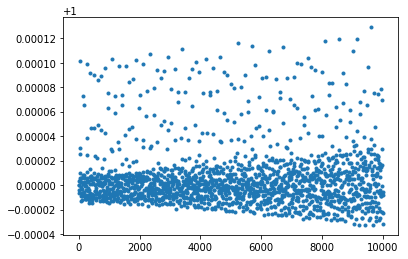

In [11]:
fig, ax = plt.subplots()
ax.plot(times, matrix[3, :,0], '.')

In [ ]:
np.save('nonrestimeseries.npy', matrix)

In [38]:
row = dfres.loc[0]
sa = rebound.SimulationArchive(pathtofolders+resonantsa+'sa'+row['runstring'])
tmax = sa[1].t
sim = sa[0]
sim.integrate(tmax, exact_finish_time=0)
sim.status()

---------------------------------
REBOUND version:     	3.7.0
REBOUND built on:    	Dec 18 2018 12:58:12
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	1.0000000173176938e+06
Current timestep:    	0.034641
---------------------------------
<rebound.Particle object, m=0.9999960150799597 x=-3.658542143467641e-06 y=-1.949623323935794e-05 z=9.470806349629878e-08 vx=6.872767724455177e-05 vy=-3.73442855666929e-06 vz=3.496108378488267e-07>
<rebound.Particle object, m=3.984920040268468e-06 x=-0.8738958364059268 y=0.4817517647367535 z=-0.003159573737010137 vx=-2.9307195320280233 vy=-5.572709926922893 vz=0.0012280114770667806>
<rebound.Particle object, m=1.2444171101394952e-05 x=0.6063431581766432 y=1.4011530424916374 z=-0.007375445763490789 vx=-4.553768175624738 vy=2.174789434522493 vz=-0.026555396336484776>
<rebound.Particle object, m=2.531702420746453e-07 x=-1.5977605108526833 y=0.5538766686714539 z=0.03817301570906049 vx=-1.5043238809838 vy=-4.4327274873988936 vz=

In [39]:
sa[1].status()

---------------------------------
REBOUND version:     	3.7.0
REBOUND built on:    	Dec 18 2018 12:58:12
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	1.0000000173176938e+06
Current timestep:    	0.034641
---------------------------------
<rebound.Particle object, m=0.9999960150799597 x=-4.856594700194382e-06 y=-1.9390399072819718e-05 z=8.843982870513587e-08 vx=6.955063834692299e-05 vy=-8.515320693078855e-06 vz=3.739948348737675e-07>
<rebound.Particle object, m=3.984920040268468e-06 x=-0.8180433296520381 y=0.5752209770263266 z=-0.0031620314346973424 vx=-3.5115624014482423 vy=-5.209884722895365 vz=-0.0009422170175565305>
<rebound.Particle object, m=1.2444171101394952e-05 x=0.684162037660043 y=1.3611697180480018 z=-0.006903453305578572 vx=-4.429348728877797 vy=2.4410887530953667 vz=-0.027931911275507863>
<rebound.Particle object, m=2.531702420746453e-07 x=-1.569761335862975 y=0.6299450423595112 z=0.03977055194939125 vx=-1.7280560050004896 vy=-4.34911033866259

In [22]:
resonantsa = 'stabilitydatasetresonant/data/resonant/simulation_archives/runs/'
dfres = pd.read_csv(pathtofolders+"stabilitydatasetresonant/data/csvs/data.csv", index_col = 0)
ddfres = dd.from_pandas(dfres, npartitions=24)
ddfres.head(10)

,runstring,seed,pairindex,j,k,Zstar,libfac,Zcom,instability_time,shadow_instability_time
0,0000000.bin,3500000,1,12,1,2.165038000000E-02,7.181011000000E-03,4.166906000000E-02,1.545872285422E+06,3.063700317874E+06
1,0000001.bin,700001,1,19,2,6.029125000000E-02,5.232044000000E-01,1.065561000000E-02,9.990000000050E+08,9.990000000050E+08
2,0000002.bin,2,0,6,1,2.635348000000E-02,1.299504000000E-02,5.031908000000E-02,9.990000000050E+08,9.990000000050E+08
3,0000003.bin,2100003,0,5,2,2.351106000000E-02,7.134149000000E-01,1.021996000000E-01,2.287670643161E+06,8.392234130233E+06
4,0000004.bin,700004,0,12,1,1.747332000000E-02,3.611717000000E-03,3.980348000000E-02,9.668931133123E+05,3.380350030993E+05
5,0000005.bin,1400005,1,23,2,4.732225000000E-03,-2.638225000000E-02,4.879355000000E-02,5.755893738980E+05,5.459780948325E+04
6,0000006.bin,6,1,5,1,6.566680000000E-02,-7.724743000000E-02,3.076866000000E-02,7.248372136519E+07,3.243220485044E+08
7,0000007.bin,2100007,0,21,2,2.515836000000E-02,2.341128000000E-01,2.971840000000E-02,2.225858492785E+04,6.193744405792E+03
8,0000008.bin,8,1,7,1,2.261202000000E-02,7.720586000000E-03,3.904033000000E-02,2.930965984778E+05,1.359759407129E+06
9,0000009.bin,700009,1,11,2,9.254916000000E-03,3.572109000000E-03,1.014287000000E-02,3.484790616249E+05,9.534973284858E+05


In [256]:
np.save('test.npy', val)

In [253]:
data = np.load('test.npy')
data.shape

(10, 1729, 18)

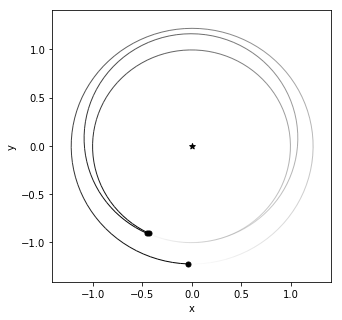

In [9]:
fig = rebound.aOrbitPlot(sim)

In [18]:
sim.dt

0.03464042484159772

In [14]:
%%time
vals = np.zeros((18, 1000))

tmax = 1e4
sim = sa[0]
sim.integrate(tmax, exact_finish_time=0)

CPU times: user 20.3 s, sys: 3.92 ms, total: 20.3 s
Wall time: 20.3 s


In [15]:
sim.status()

---------------------------------
REBOUND version:     	3.4.0
REBOUND built on:    	Dec  3 2018 09:34:54
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	1.0000000277011167e+06
Current timestep:    	0.034640
---------------------------------
<rebound.Particle object, m=1.0 x=-3.629182535523935e-05 y=1.1843522755585877e-05 z=9.692032962716541e-08 vx=-2.7539975849184616e-05 vy=-0.00021744008363471437 vz=-8.43155749795529e-07>
<rebound.Particle object, m=3.4140160192072926e-05 x=0.9225193262954728 y=0.4107034942938748 z=-0.007950327673330494 vx=-2.4266312875245175 vy=5.726893721352419 vz=0.04678499897728613>
<rebound.Particle object, m=1.8787249753397036e-05 x=0.16981871403865156 y=-1.2279135896541034 z=0.011612920399274694 vx=5.527494030376944 vy=0.9037972044771627 vz=-0.06443832825556559>
<rebound.Particle object, m=1.8268998599127623e-06 x=0.87932635067516 y=-1.5303994574427984 z=-0.02390372135108166 vx=3.5793674392077772 vy=2.705759021771257 vz=0.249891834123

In [16]:
sa[1].status()

---------------------------------
REBOUND version:     	3.4.0
REBOUND built on:    	Dec  3 2018 09:34:54
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	1.0000000277011167e+06
Current timestep:    	0.034640
---------------------------------
<rebound.Particle object, m=1.0 x=-3.629182535523935e-05 y=1.1843522755585877e-05 z=9.692032962716541e-08 vx=-2.7539975849184616e-05 vy=-0.00021744008363471437 vz=-8.43155749795529e-07>
<rebound.Particle object, m=3.4140160192072926e-05 x=0.9225193262954728 y=0.4107034942938748 z=-0.007950327673330494 vx=-2.4266312875245175 vy=5.726893721352419 vz=0.04678499897728613>
<rebound.Particle object, m=1.8787249753397036e-05 x=0.16981871403865156 y=-1.2279135896541034 z=0.011612920399274694 vx=5.527494030376944 vy=0.9037972044771627 vz=-0.06443832825556559>
<rebound.Particle object, m=1.8268998599127623e-06 x=0.87932635067516 y=-1.5303994574427984 z=-0.02390372135108166 vx=3.5793674392077772 vy=2.705759021771257 vz=0.249891834123

In [17]:
sim.t

1000000.0277011167